<a href="https://www.kaggle.com/code/raulsoriano/notebook2de9ca70ec?scriptVersionId=121001768" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


# 1.Data Preprocessing


## 1.1 Overview

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 1.2 Missing values

In [5]:
train_data.info()
print('----------------')
print('Rate of na per column')
print(train_data.isna().sum()/len(train_data))
print('----------------')
print('Unique values info')
print(test_data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------
Rate of na per column
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket       

In [6]:
test_data.info()
print('----------------')
print('Rate of na per column')
print(test_data.isna().sum()/len(train_data))
print('----------------')
print('Unique values info')
print(test_data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
----------------
Rate of na per column
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.096521
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.001122
Cabin          0.367003
Embarke

Grouping data to see more info from the data

In [7]:
print(train_data[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean())
print('-'*20)
print(train_data[['SibSp', 'Survived']].groupby(['SibSp'],as_index=False).mean())
print('-'*20)
print(train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean())
print('-'*20)
print(train_data[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
--------------------
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
--------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908
--------------------
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [8]:
train_data_corr = train_data.corr().abs().unstack().sort_values(kind='quicksort',ascending=False).reset_index()
train_data_corr.rename(columns={'level_0':'Feature 1','level_1':'Feature 2', 0: 'Correlation Coefficient'},inplace=True)
train_data_corr[train_data_corr['Feature 1']=='Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
32,Age,Survived,0.077221
36,Age,PassengerId,0.036847


La línea de código que has proporcionado realiza una imputación de valores faltantes en la columna 'Age' del DataFrame 'train_data' utilizando la mediana de las edades agrupadas por género ('Sex') y clase ('Pclass').

Para ello, se utiliza el método groupby() de Pandas para agrupar el DataFrame por las columnas 'Sex' y 'Pclass'. A continuación, se selecciona la columna 'Age' y se utiliza el método apply() para aplicar una función lambda a cada grupo de valores.

La función lambda utilizada en este caso es lambda x:x.fillna(x.median()), que toma cada grupo de valores y rellena los valores faltantes con la mediana de ese grupo. La mediana se calcula con el método median() de Pandas.

De esta manera, se imputan los valores faltantes en la columna 'Age' utilizando la mediana de las edades agrupadas por género y clase, lo que permite conservar la variabilidad dentro de cada grupo y evitar sesgos en los datos imputados.Se imputan los valores faltantes en la columna 'Age' utilizando la mediana de las edades agrupadas por género y clase, lo que permite conservar la variabilidad dentro de cada grupo y evitar sesgos en los datos imputados.

In [9]:
age_by_pclass_sex = train_data.groupby(['Sex','Pclass']).median()['Age']
train_data['Age'] = train_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))


In [10]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [12]:
#train_data[train_data['Fare'].isnull()]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


La columna "Fare" en la competición del Titanic de Kaggle se refiere al precio del billete que pagó cada pasajero.

La columna "Parch" en la competición del Titanic de Kaggle se refiere al número de padres o hijos que un pasajero tenía a bordo del Titanic.

La columna "SibSp" en la competición del Titanic de Kaggle se refiere al número de hermanos o cónyuges que un pasajero tenía a bordo del Titanic.


In [13]:
#Fare es el precio del billete
train_data.groupby(['Pclass','Parch','SibSp'])['Fare'].median()

Pclass  Parch  SibSp
1       0      0         31.00000
               1         76.72920
               2         90.00000
        1      0         77.28750
               1         81.40415
        2      0         81.85830
               1        120.00000
               2        262.37500
               3        263.00000
        4      1        263.00000
2       0      0         13.00000
               1         26.00000
               2         73.50000
               3         21.00000
        1      0         24.50000
               1         26.25000
               2         33.00000
        2      0         26.12500
               1         41.57920
        3      1         23.00000
               2         18.75000
3       0      0          7.89580
               1         15.00000
               2         18.00000
               3         15.85000
        1      0         12.47500
               1         15.50000
               2         19.25830
               3         25

Se extrae de la columna Cabin la letra de la zona de cabinas que es para saber la situacion de esta.


In [14]:
train_data['Deck'] = train_data['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')
train_data_decks = train_data.groupby(['Deck','Pclass']).count().drop(columns=['Survived','Sex','Age','SibSp','Parch','Fare','Embarked','Cabin','PassengerId','Ticket']).rename(columns = {'Name':'Count'}).transpose()
train_data_decks


Deck     A   B   C   D      E        F     G   M            T
Pclass   1   1   1   1  2   1  2  3  2  3  3   1    2    3  1
Count   15  47  59  29  4  25  4  3  8  5  4  40  168  479  1

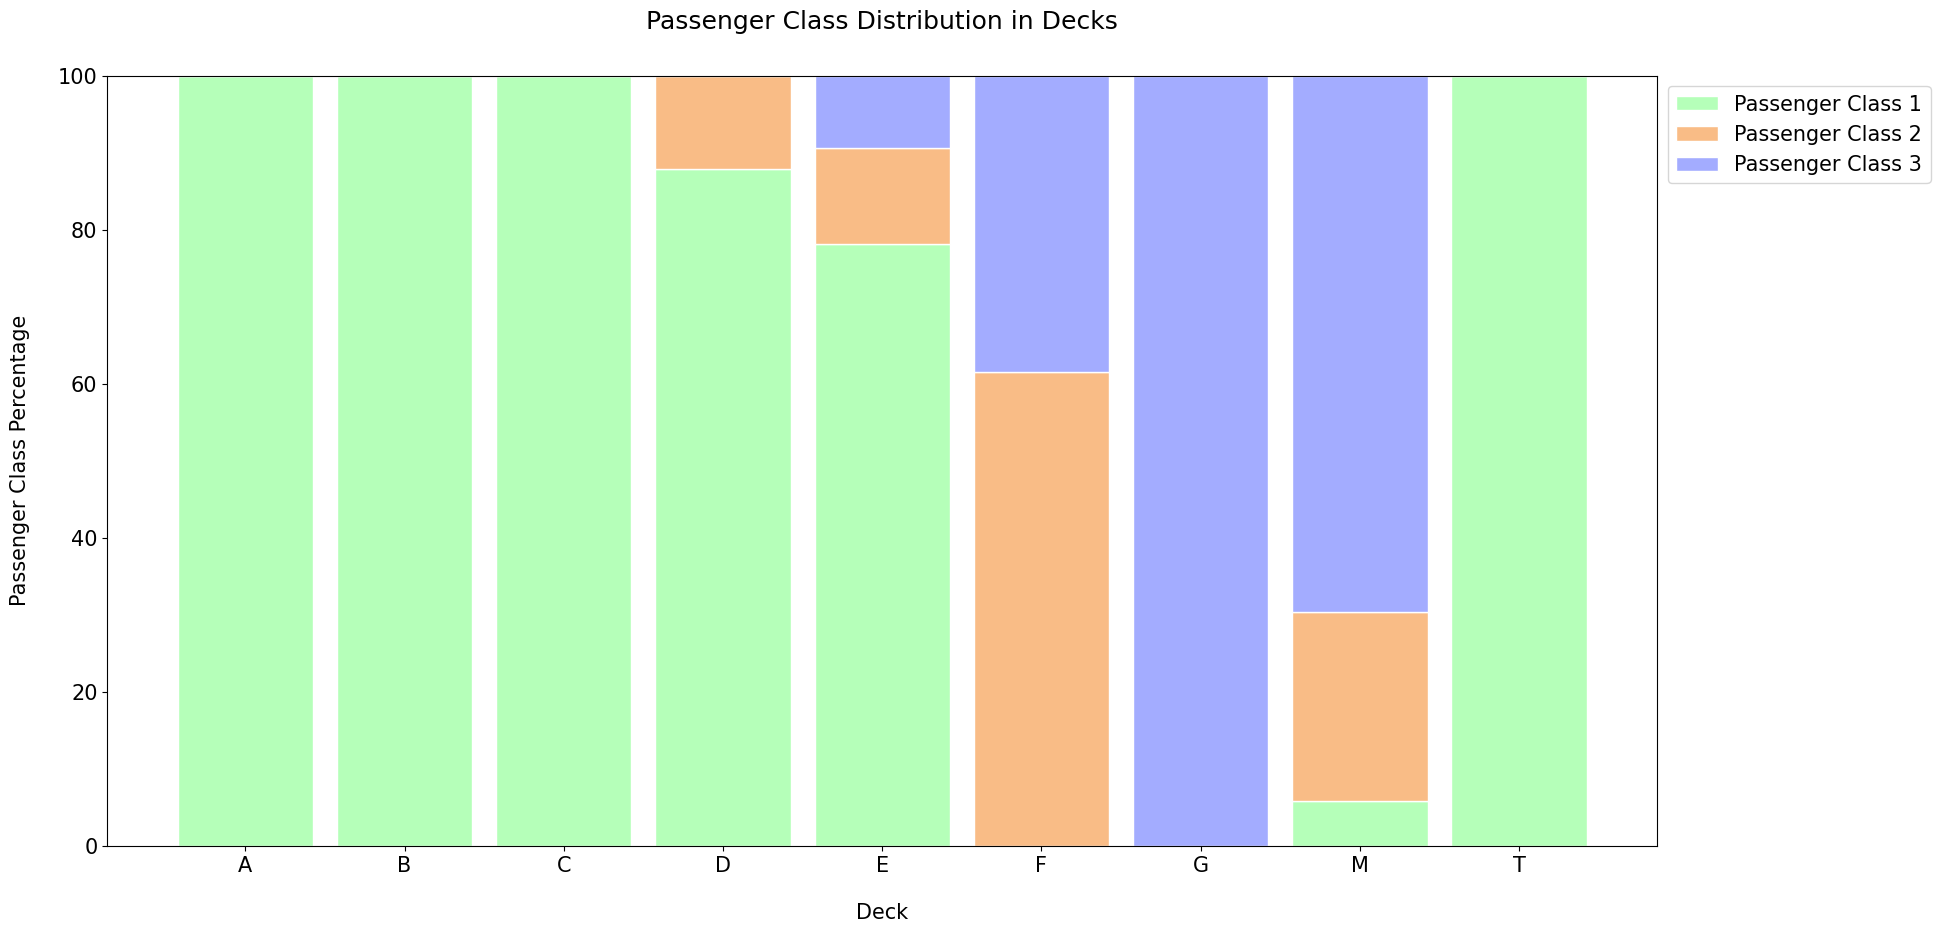

In [15]:

def get_pclass_dist(df):
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]  
    for deck in decks:
        for pclass in range(1,4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count
            except KeyError:
                deck_counts[deck][pclass] = 0
    df_decks = pd.DataFrame(deck_counts)
    deck_percentages = {}
    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum())*100 for count in df_decks[col]]
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    df_percentages = pd.DataFrame(percentages).transpose()    
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85

    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]

    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   

    plt.show()

all_deck_count, all_deck_per = get_pclass_dist(train_data_decks)
display_pclass_dist(all_deck_per)

In [16]:
idx = train_data[train_data['Deck']=='T'].index
train_data.loc[idx,'Deck']='A'
train_data.loc[339]

PassengerId                             340
Survived                                  0
Pclass                                    1
Name           Blackwell, Mr. Stephen Weart
Sex                                    male
Age                                    45.0
SibSp                                     0
Parch                                     0
Ticket                               113784
Fare                                   35.5
Cabin                                     T
Embarked                                  S
Deck                                      A
Name: 339, dtype: object

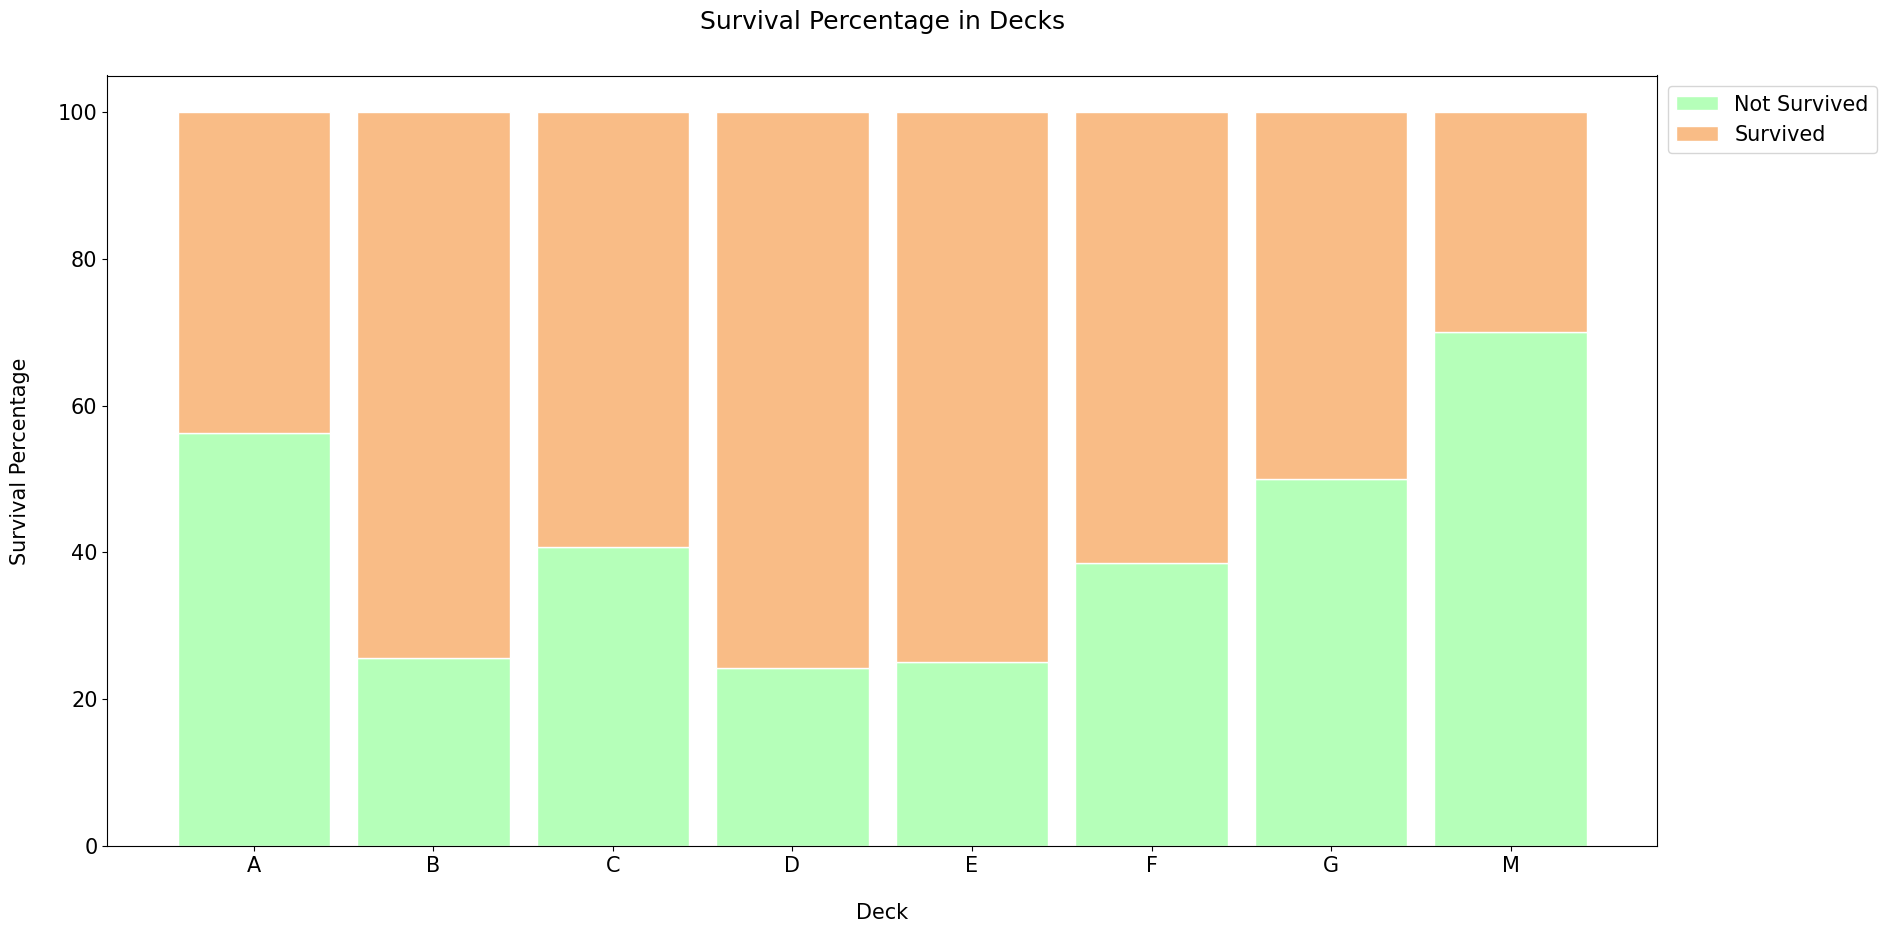

In [17]:
train_data_decks_survived = train_data.groupby(['Deck','Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    surv_counts={'A':{},'B':{},'C':{},'D':{},'E':{},'F':{},'G':{},'M':{}} 
    decks=df.columns.levels[0]
    for deck in decks:
        for survive in range(0,2):
            surv_counts[deck][survive] = df[deck][survive][0]

    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count/df_surv[col].sum()) * 100 for count in df_surv[col]]

    return surv_counts,surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(train_data_decks_survived)
display_surv_dist(all_surv_per)



There is no pattern in survival percentage as it can be seen in the bar chart.

Nonetheless, the Decks are simplified because if seems that there are some pattern in the passenger class percentage.

In [18]:
train_data['Deck'] = train_data['Deck'].replace(['A','B','C'],'ABC')
train_data['Deck'] = train_data['Deck'].replace(['F','G'],'FG')
train_data['Deck'] = train_data['Deck'].replace(['D','E'],'DE')

train_data['Deck'].value_counts()

M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64

## 1.3 Feature visualization

In [19]:
train_data_corr = train_data.drop(['PassengerId'],axis = 1).corr().abs().unstack().sort_values(kind='quick sort', ascending=False).reset_index()
train_data_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
train_data_corr.drop(train_data_corr.iloc[1::2].index,inplace = True)
train_data_corr_nd = train_data_corr.drop(train_data_corr[train_data_corr['Correlation Coefficient']==1.0].index)
test_data_corr = test_data.drop(['PassengerId'],axis = 1).corr().abs().unstack().sort_values(kind='quick sort', ascending=False).reset_index()
test_data_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
test_data_corr.drop(test_data_corr.iloc[1::2].index,inplace = True)
test_data_corr_nd = test_data_corr.drop(test_data_corr[test_data_corr['Correlation Coefficient']==1.0].index)
train_data_corr_nd

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.549500
8,Parch,SibSp,0.414838
10,Age,Pclass,0.413583
12,Survived,Pclass,0.338481
14,Fare,Survived,0.257307
16,SibSp,Age,0.249854
18,Fare,Parch,0.216225
20,Age,Parch,0.175526
22,SibSp,Fare,0.159651
24,Age,Fare,0.122692


Se seleccionan los pares de variables con correlaciones mayores de 1.

In [20]:
# Training set high correlations
corr = train_data_corr_nd['Correlation Coefficient'] > 0.1
train_data_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.549500
8,Parch,SibSp,0.414838
10,Age,Pclass,0.413583
12,Survived,Pclass,0.338481
14,Fare,Survived,0.257307
16,SibSp,Age,0.249854
18,Fare,Parch,0.216225
20,Age,Parch,0.175526
22,SibSp,Fare,0.159651
24,Age,Fare,0.122692


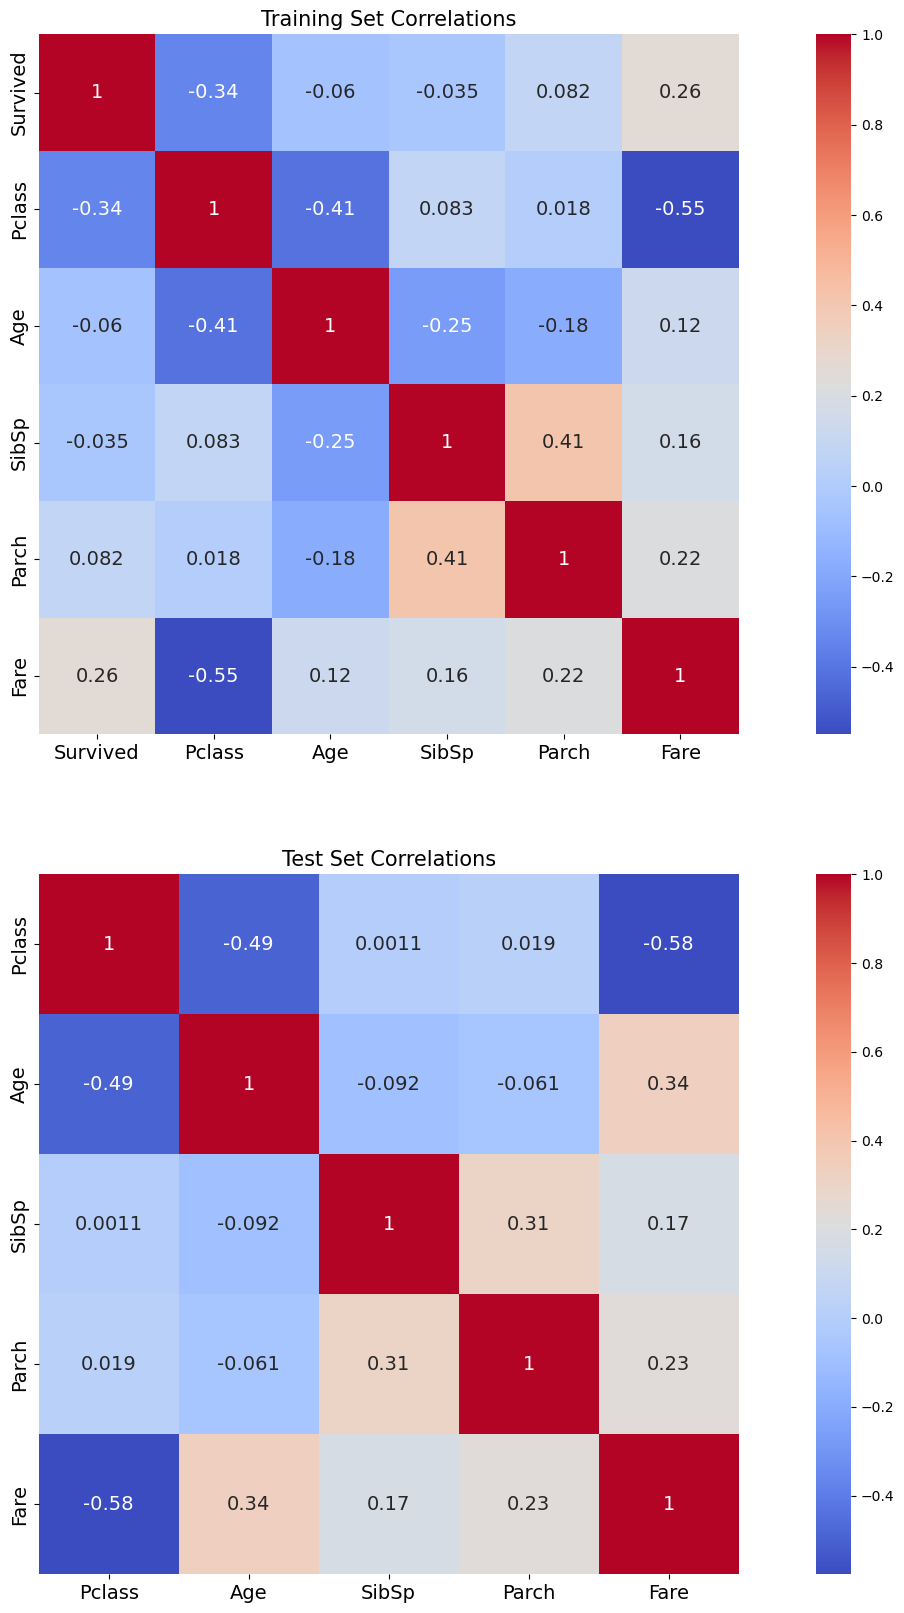

In [21]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

sns.heatmap(train_data.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(test_data.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

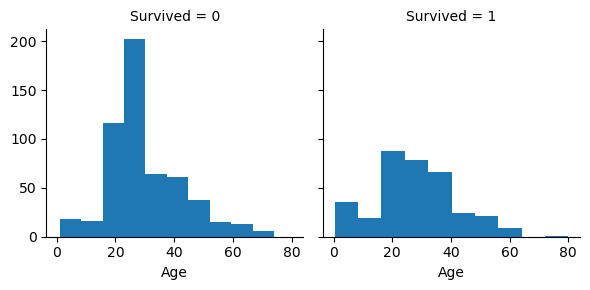

In [22]:
histogram = sns.FacetGrid(train_data,col = 'Survived')
histogram.map(plt.hist,'Age')

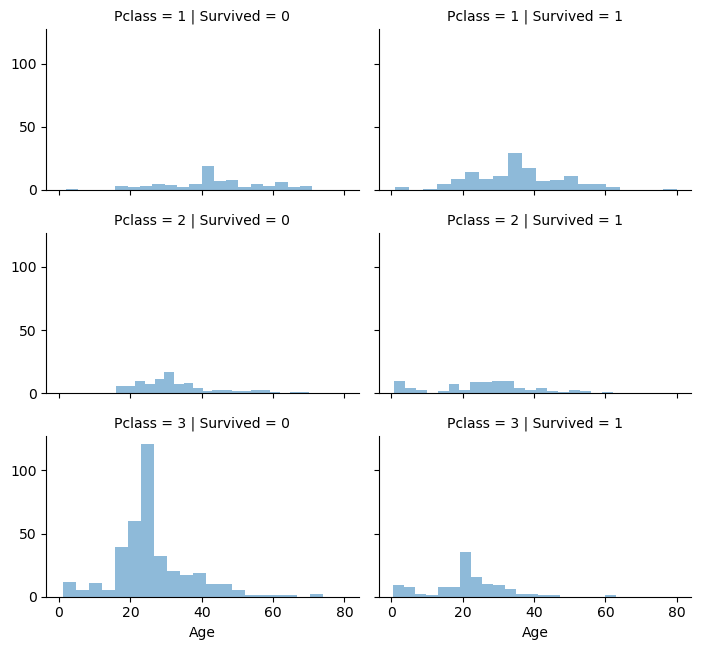

In [23]:
grid = sns.FacetGrid(train_data,col='Survived', row='Pclass', height=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


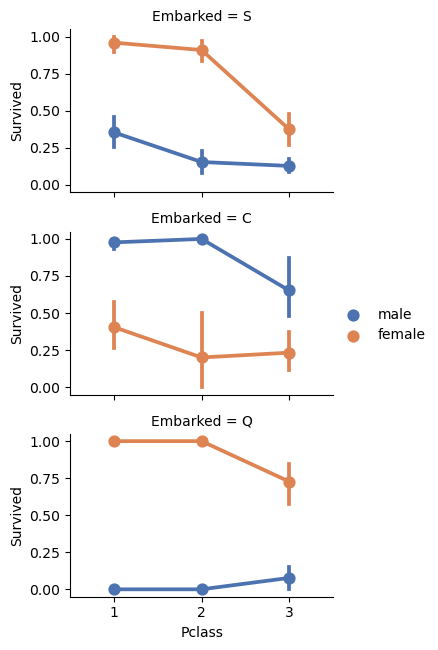

In [24]:
grid = sns.FacetGrid(train_data,row='Embarked',height=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.7/site-packages/s

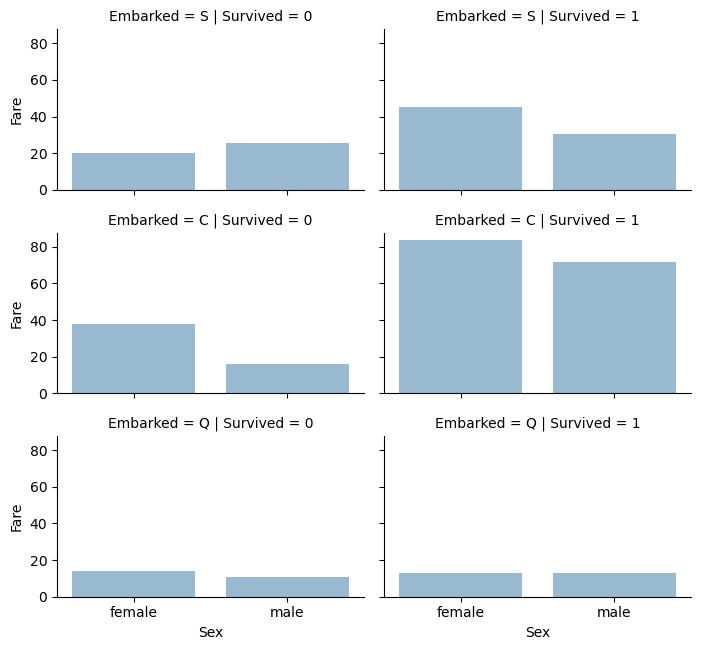

In [25]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [26]:
train_data=train_data.drop(['Ticket','Cabin','Deck'],axis=1)
test_data=test_data.drop(['Ticket','Cabin'],axis=1)
combine = [train_data, test_data]

## 1.4 Retain the new Title feature for model training
name--title

age--ageband

Family_size--SibSp+Parch+1

In [27]:
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [28]:
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [29]:
test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

In [30]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
combine = [train_data, test_data]
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


In [31]:
combine = [train_data, test_data]
train_data.shape, test_data.shape

((891, 11), (418, 10))

Este código busca estimar la edad de los pasajeros del Titanic que no tienen una edad registrada en función de su género y clase de pasajero. Se calcula la mediana de las edades de los pasajeros que sí tienen edad registrada para cada combinación de género y clase de pasajero y se redondea al medio año más cercano. Luego, se sustituyen estas estimaciones de edad para los pasajeros sin edad registrada que cumplen la misma combinación de género y clase de pasajero. Al final, se convierte la columna "Age" en un tipo de dato entero y se imprime la cabeza del DataFrame train_data.

In [32]:
guess_ages = np.zeros((2,3))
guess_ages

for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_data = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_data.median()
            
            #Convert random age float to nearest .5 age
            guess_ages[i,j] = int(age_guess/0.5 + 0.5)*0.5
    
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1),'Age']= guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,S,1


In [33]:
#divide los valores de la columna "Age" en cinco grupos y los asigna a una banda específica
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=32),'Age']=1
    dataset.loc[(dataset['Age']>32)&(dataset['Age']<=48),'Age']=2
    dataset.loc[(dataset['Age']>48)&(dataset['Age']<=64),'Age']=3
    dataset.loc[dataset['Age']>64,'Age']=4

train_data = train_data.drop(['AgeBand'],axis=1)
combine = [train_data, test_data]

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S,1


Esta línea de código crea una nueva columna llamada "FamilySize" en el DataFrame dataset. La columna se calcula sumando las columnas "SibSp" y "Parch", que representan el número de hermanos/cónyuges y el número de padres/hijos a bordo del Titanic, respectivamente. A este número se le suma 1, lo que representa el propio pasajero, para obtener el tamaño total de la familia de cada pasajero. En resumen, esta línea de código agrega información adicional sobre el tamaño de la familia de cada pasajero al DataFrame.

In [34]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean()

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S,3,2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S,1,1,1


In [35]:
for dataset in combine:
    dataset['Age*Class']=dataset.Age * dataset.Pclass

train_data.loc[:,['Age*Class','Age','Pclass']].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


Este bloque de código se encarga de manejar los valores faltantes en la columna "Embarked", reemplazándolos con la moda, convirtiendo los valores categóricos en valores numéricos y calculando la tasa de supervivencia por puerto de embarque.

In [36]:
freq_port = train_data.Embarked.dropna().mode()[0]
print(freq_port)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_data[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by="Survived",ascending=False)

train_data[['Embarked']]=train_data[['Embarked']].apply(LabelEncoder().fit_transform)
test_data[['Embarked']]=train_data[['Embarked']].apply(LabelEncoder().fit_transform)
train_data.head()

S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,2,1,2,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,0,3,2,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,2,2,1,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,2,3,2,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,2,1,1,1,6


In [37]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
print(train_data.head())

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
combine = [train_data, test_data]

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0    1      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1    2      1      0   
2                             Heikkinen, Miss. Laina    1    1      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1    2      1      0   
4                           Allen, Mr. William Henry    0    2      0      0   

      Fare  Embarked  Title  FamilySize  IsAlone  Age*Class         FareBand  
0   7.2500         2      1           2        0          3   (-0.001, 7.91]  
1  71.2833         0      3           2        0          2  (31.0, 512.329]  
2   7.9250         2      2           1        1          3   (7.

# 2 Predictions

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [39]:
X_train = train_data.drop(['Survived','PassengerId','Name'], axis = 1)
Y_train = train_data['Survived']
X_test = test_data.drop(['PassengerId','Name'], axis = 1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

In [40]:
#features = ['Pclass', 'Sex', 'SibSp', 'Parch']
#X = pd.get_dummies(train_data[features])
#X_test = pd.get_dummies(test_data[features])
#y = train_data['Survived']
#model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
#model.fit(X,y)
#predictions = model.predict(X_test)

#accuracy = accuracy_score(predictions, y)
#print("Porcentaje de aciertos:", accuracy)

# 2.1 Decision Tree

In [41]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,3,0,1,1,0,0,2,1,2,0,3
1,1,1,2,1,0,3,0,3,2,0,2
2,3,1,1,0,0,1,2,2,1,1,3
3,1,1,2,1,0,3,2,3,2,0,2
4,3,0,2,0,0,1,2,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,1,0,0,1,2,5,1,1,2
887,1,1,1,0,0,2,2,2,1,1,1
888,3,1,1,1,2,2,2,2,4,0,3
889,1,0,1,0,0,2,0,1,1,1,1


In [42]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
#print("The accurancy of Decision Tree is",acc_decision_tree)

In [43]:
#models = pd.DataFrame({'Model':['Supporting Vector Machines','KNN','Logistic Regression','Random Forest','Naive Bayes','Decision Tree'],'Score':[acc_svc,acc_knn,acc_log,acc_random_forest,acc_gaussian, acc_decision_tree]})
#models.sort_values(by='Score',ascending=False)

# GridSearch

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection, metrics

In [45]:
rf0 = RandomForestClassifier(oob_score=True, random_state=10)
rf0.fit(X_train,Y_train)
print(rf0.oob_score_)
#Y_pred = rf0.predict(X_train)
#print("AUC Score (Train): %f" % metrics.roc_auc_score(Y_pred, Y_train))

0.8114478114478114


In [46]:
param_test1 = {'n_estimators':range(10,71,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.cv_results_['mean_test_score'], gsearch1.cv_results_['params'],gsearch1.best_params_, gsearch1.best_score_

(array([0.83113786, 0.85812532, 0.86295123, 0.86465146, 0.86515048,
        0.86427375, 0.86431942]),
 [{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 60},
  {'n_estimators': 70}],
 {'n_estimators': 50},
 0.8651504806150623)

In [47]:
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 60,min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(X_train,Y_train)
gsearch2.cv_results_['mean_test_score'], gsearch2.cv_results_['params'],gsearch2.best_params_, gsearch2.best_score_

(array([0.86556143, 0.86239977, 0.85935301, 0.85942227, 0.85977849,
        0.85948679, 0.85805666, 0.85649359, 0.8671856 , 0.86625613,
        0.86205053, 0.86222214, 0.86129024, 0.86043977, 0.86040364,
        0.8575246 , 0.86576432, 0.86721036, 0.86318345, 0.8628344 ,
        0.86161125, 0.86054672, 0.86040364, 0.8575246 , 0.86598162,
        0.86777142, 0.86318345, 0.8628344 , 0.86161125, 0.86054672,
        0.86040364, 0.8575246 , 0.86598162, 0.86777142, 0.86318345,
        0.8628344 , 0.86161125, 0.86054672, 0.86040364, 0.8575246 ,
        0.86598162, 0.86777142, 0.86318345, 0.8628344 , 0.86161125,
        0.86054672, 0.86040364, 0.8575246 ]),
 [{'max_depth': 3, 'min_samples_split': 50},
  {'max_depth': 3, 'min_samples_split': 70},
  {'max_depth': 3, 'min_samples_split': 90},
  {'max_depth': 3, 'min_samples_split': 110},
  {'max_depth': 3, 'min_samples_split': 130},
  {'max_depth': 3, 'min_samples_split': 150},
  {'max_depth': 3, 'min_samples_split': 170},
  {'max_depth': 3, 'min

In [48]:
rf1 = RandomForestClassifier(n_estimators= 60, max_depth=9, min_samples_split=50,min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10)
rf1.fit(X_train,Y_train)
print(rf1.oob_score_)

0.819304152637486


In [49]:
param_test3 = {'min_samples_split':range(80,150,20), 'min_samples_leaf':range(10,60,10)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 60, max_depth=9,max_features='sqrt' ,oob_score=True, random_state=10),param_grid = param_test3, scoring='roc_auc', cv=5)
gsearch3.fit(X_train,Y_train)
gsearch3.cv_results_['mean_test_score'], gsearch3.cv_results_['params'], gsearch3.best_params_, gsearch3.best_score_

(array([0.86643844, 0.86490945, 0.86344709, 0.86152297, 0.8645093 ,
        0.86427375, 0.86185184, 0.8613166 , 0.85860537, 0.85750921,
        0.85501072, 0.85748586, 0.85798778, 0.85828891, 0.85521681,
        0.85678791, 0.85425042, 0.85425042, 0.85275228, 0.85036718]),
 [{'min_samples_leaf': 10, 'min_samples_split': 80},
  {'min_samples_leaf': 10, 'min_samples_split': 100},
  {'min_samples_leaf': 10, 'min_samples_split': 120},
  {'min_samples_leaf': 10, 'min_samples_split': 140},
  {'min_samples_leaf': 20, 'min_samples_split': 80},
  {'min_samples_leaf': 20, 'min_samples_split': 100},
  {'min_samples_leaf': 20, 'min_samples_split': 120},
  {'min_samples_leaf': 20, 'min_samples_split': 140},
  {'min_samples_leaf': 30, 'min_samples_split': 80},
  {'min_samples_leaf': 30, 'min_samples_split': 100},
  {'min_samples_leaf': 30, 'min_samples_split': 120},
  {'min_samples_leaf': 30, 'min_samples_split': 140},
  {'min_samples_leaf': 40, 'min_samples_split': 80},
  {'min_samples_leaf': 40, '

In [50]:
submision = pd.DataFrame({'PassengerId':test_data['PassengerId'],"Survived":Y_pred})
submision.to_csv('submission.csv', index=False)